In [1]:
import numpy as np
import scipy
from scipy.ndimage import gaussian_filter1d
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

import sys,os,pdb,copy,pickle
from importlib import reload
import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp
import database
db = database.db

import change_point_analysis as cpa
import change_point_plot as cpp
import change_point_post_analysis as cppa
import place_field_analysis as pf
import pingouin as pg
import trial_correlates as tc
import tqdm
import misc

import switch_analysis_one_session as saos
reload(saos)

reload(misc)
import nmf_sweep_error as nse
from collections import OrderedDict

67 sessions!
67 sessions!
<module 'sys' (built-in)>


In [2]:
figdir = '/mnt/home/szheng/ceph/place_variability/fig/cosyne'

db_sorted = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)
data_dir_full = db_sorted['data_dir_full'][0]

In [3]:
import test_contiguous_instability as tsi

<module 'sys' (built-in)>


In [4]:
%%time
reload(pf)
place_field_res_l = OrderedDict()
for ii in tqdm.tqdm(range(len(db_sorted['data_dir_full']))):
    ddf = db_sorted['data_dir_full'][ii]
    pf_res =pf.field_detection_both_avg_trial_wrapper(ddf, dosave=True,force_reload=False,nbins = 100, 
                                        save_fn = 'place_field_avg_and_trial_vthresh.p', 
                                        shuffle_fn='fr_map_null_trialtype_vthresh.p',
                                        smth_in_bin=2.5, speed_thresh=1.,speed_key='v',load_only=True
                                        )
    ani = db_sorted.iloc[ii]['animal_name.1']
    sess = db_sorted.iloc[ii]['sess_name']
    place_field_res_l[ani,sess] = pf_res
    

  1%|▏         | 1/67 [00:00<00:09,  7.17it/s]

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


  4%|▍         | 3/67 [00:00<00:08,  7.61it/s]

/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


  6%|▌         | 4/67 [00:00<00:09,  6.71it/s]

/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220119/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


  7%|▋         | 5/67 [00:00<00:08,  7.34it/s]

/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220120/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


  9%|▉         | 6/67 [00:00<00:08,  7.56it/s]

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211019/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210328/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 13%|█▎        | 9/67 [00:00<00:05, 11.11it/s]

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211116/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211213/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m1/e16_3m1_210111/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 16%|█▋        | 11/67 [00:01<00:04, 12.03it/s]

/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211212/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211211/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 19%|█▉        | 13/67 [00:01<00:04, 12.94it/s]

/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m1/e16_3m1_210203/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211210/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 24%|██▍       | 16/67 [00:01<00:03, 15.32it/s]

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211119/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211124/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 30%|██▉       | 20/67 [00:01<00:02, 17.03it/s]

/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m1/e16_3m1_210201/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210331/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m1/e16_3m1_210119/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 34%|███▍      | 23/67 [00:01<00:02, 15.90it/s]

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210302/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210317/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210312/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 40%|████      | 27/67 [00:02<00:03, 11.58it/s]

/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200809/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200809/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200812/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210314/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 45%|████▍     | 30/67 [00:02<00:02, 13.28it/s]

/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200729/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210319/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210315/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 57%|█████▋    | 38/67 [00:02<00:01, 21.01it/s]

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210322/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_201002/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200723/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_201004/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200716/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200920/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 66%|██████▌   | 44/67 [00:03<00:01, 22.83it/s]

/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200723/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201129/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201125/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_2m1/e16_2m1_201129/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_2m1/e16_2m1_201206/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200917/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 76%|███████▌  | 51/67 [00:03<00:00, 24.85it/s]

/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200918/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200919/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200719/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201208/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201206/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200923/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 90%|████████▉ | 60/67 [00:03<00:00, 32.44it/s]

/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200720/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_2m1/e16_2m1_201121/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_201001/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200717/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200715/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201121/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


100%|██████████| 67/67 [00:03<00:00, 18.39it/s]

/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200823/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200824/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
CPU times: user 653 ms, sys: 165 ms, total: 818 ms
Wall time: 3.65 s


In [5]:
res_to_save_data_detection_l=pickle.load(open(os.path.join('/mnt/home/szheng/ceph/place_variability/data','switch_res_allromsess_highrepeats_swmag0dot4.p'),'rb'))
plt.close('all')
sess_selected = db_sorted.loc[db_sorted['n_pyr_putative'] >= 50,'sess_name']
switch_detection_res_allsess = cppa.reshape_switch_detection_result_all_sess(res_to_save_data_detection_l,sess_selected)

# switch_detection_res_allsess = saos.load_switch_analysis_res_allsess(save_fn_one='shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p'
#     ,force_reload=False,dosave=True,load_only=False,n_pyr_thresh=50)





/mnt/home/szheng/projects/nmf_analysis/change_point_post_analysis.py:37: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  switch_detection_res_allsess[detection][key] = switch_detection_res_allsess[detection][key].loc[(slice(None),sess_selected.values),:]
/mnt/home/szheng/projects/nmf_analysis/change_point_post_analysis.py:37: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  switch_detection_res_allsess[detection][key] = switch_detection_re

In [247]:
failed_l

['e14_2m2_201013',
 'e14_2m2_201022',
 'e14_2m2_201019',
 'e15_10m1_200727',
 'e14_2m2_201017',
 'e15_9f1_200802']

In [6]:
%%time
db_sorted_filt = db_sorted.loc[db_sorted['n_pyr_putative']>50]
data_dir_and_sess=list(db_sorted_filt[['data_dir_full','animal_name.1','sess_name']].itertuples(index=False,name=None))
save_fn = 'shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p'#'shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean.p'
# for ddf, sess in data_dir_and_sess:
instability_res_l = OrderedDict()
instability_ratio_l = OrderedDict()
failed_l = []
for ddf,ani, sess in data_dir_and_sess:
    try:
        instability_res_l[(ani,sess)] = tsi.test_contiguous_instability(ddf,force_reload=False,load_only=True)
        instability_ratio_l[(ani,sess)] = instability_res_l[(ani,sess)]['ratio_d']
    except Exception as e:
        failed_l.append(sess)
        print(e)
        
instability_ratio_l = pd.DataFrame(instability_ratio_l).T # one task type!
# pickle.dump(res_to_save_data_detection_l, open(os.path.join('/mnt/home/szheng/ceph/place_variability/data','switch_res_allromsess_highrepeats_swmag0dot4.p'),'wb'))


/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/instability/contiguous_instability_avg.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/instability/contiguous_instability_avg.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118/py_data/instability/contiguous_instability_avg.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220119/py_data/instability/contiguous_instability_avg.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220120/py_data/instability/contiguous_instability_avg.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211019/py_data/instability/contiguous_instability_avg.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210328/py_data/instability/contiguous_instability_avg.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211116/py_d

In [7]:
instability_res_l_df = pd.concat({k:pd.concat(val['instability_df_d'],axis=0) for k,val in instability_res_l.items() if val is not None},axis=0)
instability_res_l_df=instability_res_l_df.loc[(slice(None),slice(None),0,slice(None))]



In [229]:
instability_res_l_df['p'].shape[0]

12215

In [57]:
sns.reset_orig()

In [54]:
# sns.set_style("whitegrid", {'axes.grid' : False})

In [63]:
instability_res_l_df['issig'].max(axis=1)

e13_26m1  e13_26m1_210913  0  0.0  3   0    1.0
                                   27  0    1.0
                                   29  0    1.0
                                       1    1.0
                                       2    0.0
                                           ... 
e14_2m3   e14_2m3_201206   0  1.0  57  0    0.0
                                   59  0    0.0
                                   62  0    1.0
                                   63  0    0.0
                                       1    1.0
Length: 14557, dtype: float64

In [75]:
plt.rcParams.update({'font.size': 15})

In [98]:
def plot_pvals_allfields(ax=None,text_font_size=20):
    p_selected=instability_res_l_df['p'].loc[:,1:3]
    p_min = p_selected.min(axis=1) # only 1 to 3 change points
#     anysig = instability_res_l_df['issig'].max(axis=1)
    alpha = 0.05 / 3
    anysig = p_min < alpha
    ax=p_min.hist(bins=100,alpha=0.5,ax=ax)
    n_tot_field = instability_res_l_df['p'].shape[0]
    frac_sig = anysig.mean()
    ax.text(0.5,0.3,f"{frac_sig * 100:.01f}% significant,\n N_field= {n_tot_field}",fontsize=text_font_size,transform=ax.transAxes)
    ax.grid(False)
    ax.axvline(alpha,linestyle=':',linewidth=4,c='k',label='alpha=0.05 \nw/Bonf Corr')
    ax.legend()
    ax.set(xlabel='P-value',ylabel='Num. Fields',title='P-values from the Shuffle Test\n per Field')
    return ax

<AxesSubplot:title={'center':'P-values from the Shuffle Test\n per Field'}, xlabel='P-value', ylabel='Num. Fields'>

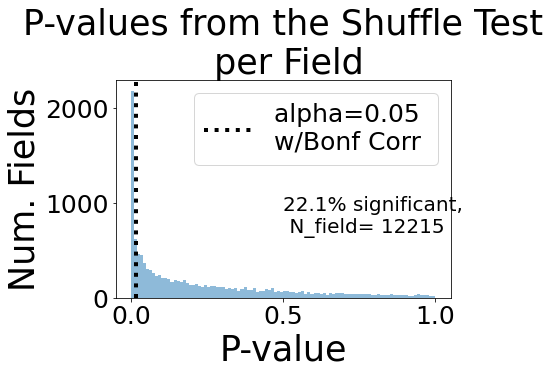

In [68]:
plot_pvals_allfields()

[Text(0.5, 0, 'P-value'),
 Text(0, 0.5, 'Num. Fields'),
 Text(0.5, 1.0, 'P-values from the Shuffle Test\n per Field')]

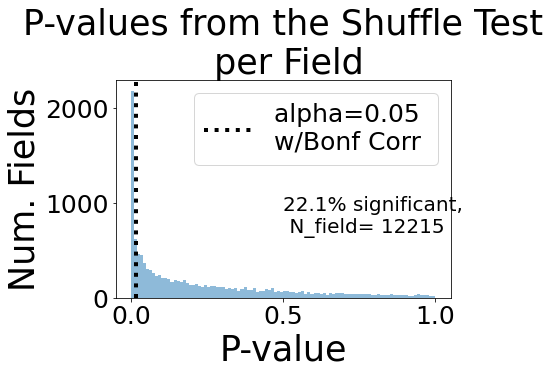

In [72]:
p_selected=instability_res_l_df['p'].loc[:,1:3]
p_min = p_selected.min(axis=1) # only 1 to 3 change points
#     anysig = instability_res_l_df['issig'].max(axis=1)
alpha = 0.05 / 3
anysig = p_min < alpha
ax=p_min.hist(bins=100,alpha=0.5)
n_tot_field = instability_res_l_df['p'].shape[0]
frac_sig = anysig.mean()
ax.text(0.5,0.3,f"{frac_sig * 100:.01f}% significant,\n N_field= {n_tot_field}",fontsize=20,transform=ax.transAxes)
ax.grid(False)
ax.axvline(alpha,linestyle=':',linewidth=4,c='k',label='alpha=0.05 \nw/Bonf Corr')
ax.legend()
ax.set(xlabel='P-value',ylabel='Num. Fields',title='P-values from the Shuffle Test\n per Field')

In [73]:
frac_sig_fields_per_sess = anysig.groupby(level=(0,1,2)).apply(lambda x:x.mean(axis=0))

In [258]:
frac_sig_fields_per_sess.groupby(level=0).count()

e13_16f1    18
e13_26m1    10
e14_2m3      8
e15_10m1    10
e15_13f1     8
e15_9f1      6
e16_1f1     12
e16_2m1      4
e16_3m1      8
e16_3m2      8
dtype: int64

In [97]:
def plot_frac_within_sess_hist(ax=None,text_font_size=20):
    if ax is None:
        fig,ax=plt.subplots()
    ax.hist(frac_sig_fields_per_sess,alpha=0.5)
    med = frac_sig_fields_per_sess.median()
    nsess = frac_sig_fields_per_sess.shape[0]
    n_animal = frac_sig_fields_per_sess.groupby(level=0).count().shape[0]
    ax.text(0.4,0.5,f'N_session = {nsess}\n N_animal = {n_animal}',transform=ax.transAxes,fontsize=text_font_size)

    ax.set(xlabel='Fraction within Session',title='Fields with Structured Variability',ylabel='Num. Sessions')
    ax.axvline(med,linewidth=4,label=f'Median = {med:.02f}')
    ax.legend()
    return ax
# fig.savefig(os.path.join(figdir,'fraction_within_sess_with_structured_variability.pdf'),bbox_inches='tight')


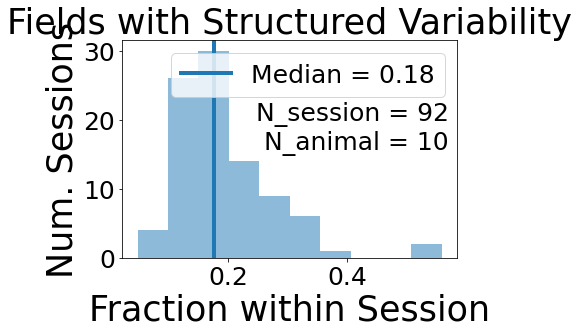

In [89]:
fig,ax=plt.subplots()
ax.hist(frac_sig_fields_per_sess,alpha=0.5)
med = frac_sig_fields_per_sess.median()
nsess = frac_sig_fields_per_sess.shape[0]
n_animal = frac_sig_fields_per_sess.groupby(level=0).count().shape[0]
ax.text(0.4,0.5,f'N_session = {nsess}\n N_animal = {n_animal}',transform=ax.transAxes)

ax.set(xlabel='Fraction within Session',title='Fields with Structured Variability',ylabel='Num. Sessions')
ax.axvline(med,linewidth=4,label=f'Median = {med:.02f}')
ax.legend()

# fig.savefig(os.path.join(figdir,'fraction_within_sess_with_structured_variability.pdf'),bbox_inches='tight')


In [78]:
changes_one = res_to_save_data_detection_l['e13_26m1', 'e13_26m1_210913']['avg']['changes_df'].loc[0,0,0.3].dropna(axis=1).droplevel((0,1))



/tmp/ipykernel_55936/2011168056.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  changes_one = res_to_save_data_detection_l['e13_26m1', 'e13_26m1_210913']['avg']['changes_df'].loc[0,0,0.3].dropna(axis=1).droplevel((0,1))


# get min state duration for each field!

In [76]:
def get_min_state_duration(changes_one,include_nochange=False):
    changes_one = changes_one.dropna(axis=1)
    mat = (changes_one!=0).values
    if include_nochange:
        mat = np.concatenate([np.ones((mat.shape[0],1)),mat,np.ones((mat.shape[0],1))],axis=1)
    field_inds, trial_inds = np.nonzero(mat)
    field_inds_unique = np.unique(field_inds)
    dur_min_l = []
    if include_nochange:
        for fi in field_inds_unique:
            change_points_extended = trial_inds[field_inds==fi]
    #         change_points_extended = np.array([0,*trial_inds_one,changes_one.shape[1]])
            durations = np.diff(change_points_extended)
            dur_min = np.min(durations)
            dur_min_l.append(dur_min)
    else:
        for fi in field_inds_unique:
            trial_inds_one = trial_inds[field_inds==fi]
            change_points_extended = np.array([-1,*trial_inds_one,changes_one.shape[1]])
            durations = np.diff(change_points_extended)
            dur_min = np.min(durations)
            dur_min_l.append(dur_min)
        
    dur_min_l = np.array(dur_min_l)
    return dur_min_l

In [77]:
changes_df_allsess = switch_detection_res_allsess['avg']['changes_df'].loc[(slice(None),slice(None),slice(None),slice(None),0.3),:].droplevel((4,5,6))



In [78]:
dur_min_l_allsess_include_nochange = changes_df_allsess.groupby(level=(0,1,2,3)).apply(get_min_state_duration,True)
dur_min_l_allsess_include_nochange_concat=np.concatenate(dur_min_l_allsess_include_nochange.values)

dur_min_l_allsess = changes_df_allsess.groupby(level=(0,1,2,3)).apply(get_min_state_duration,False)
dur_min_l_allsess_concat=np.concatenate(dur_min_l_allsess.values)



In [102]:
def plot_min_state_duration(ax=None,text_font_size=20):
    if ax is None:
        fig,ax=plt.subplots()

    bins_center = np.arange(1,20)
    bins_edge = bins_center - 0.5

    ax.hist(dur_min_l_allsess_concat,bins=bins_edge,alpha=0.5)
    # ax.hist(dur_min_l_allsess_include_nochange_concat,bins=bins,alpha=0.3)
    ax.axvline(1.5,linestyle=':',color='k',linewidth=3)
    frac_bigger_one = (dur_min_l_allsess_concat > 1).mean()
    n_fields_left = len(dur_min_l_allsess_concat)
    ax.text(4,1100,f'{frac_bigger_one*100:.01f}% more than one trial\n N_switching_field = {n_fields_left}',fontsize=text_font_size)
    _=ax.set(xlabel='Min. State Duration',ylabel='Num. Fields',title='Minimum State Duration\nper Field')
    ax.set_xticks(bins_center[::2])
    ax.set_xticklabels(bins_center[::2])
    return ax
# fig.savefig(os.path.join(figdir,'min_state_duration_per_field.pdf'),bbox_inches='tight')


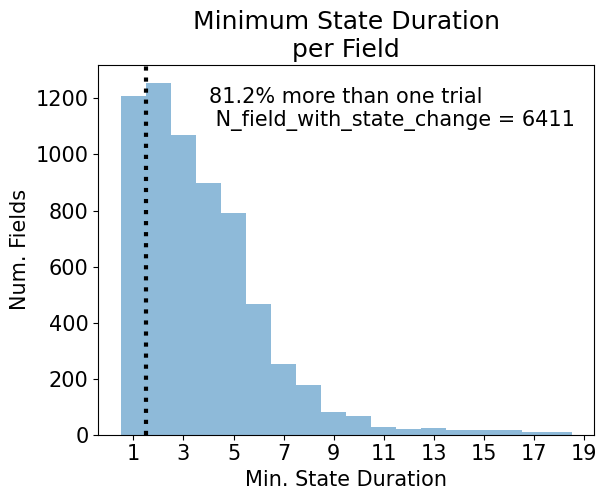

In [267]:
fig,ax=plt.subplots()

bins_center = np.arange(1,20)
bins_edge = bins_center - 0.5

ax.hist(dur_min_l_allsess_concat,bins=bins_edge,alpha=0.5)
# ax.hist(dur_min_l_allsess_include_nochange_concat,bins=bins,alpha=0.3)
ax.axvline(1.5,linestyle=':',color='k',linewidth=3)
frac_bigger_one = (dur_min_l_allsess_concat > 1).mean()
n_fields_left = len(dur_min_l_allsess_concat)
ax.text(4,1100,f'{frac_bigger_one*100:.01f}% more than one trial\n N_switching_field = {n_fields_left}')
_=ax.set(xlabel='Min. State Duration',ylabel='Num. Fields',title='Minimum State Duration\nper Field')
ax.set_xticks(bins_center[::2])
ax.set_xticklabels(bins_center[::2])
fig.savefig(os.path.join(figdir,'min_state_duration_per_field.pdf'),bbox_inches='tight')


# select examples

In [80]:
X_raw_one = res_to_save_data_detection_l['e13_26m1','e13_26m1_210913']['avg']['X']['raw'][0,0]
X_pwc_one = res_to_save_data_detection_l['e13_26m1','e13_26m1_210913']['avg']['X'][0.3][0,0]
fr_mean_one = place_field_res_l['e13_26m1','e13_26m1_210913']['avg']['params'][0,0].loc['fr_mean']

In [308]:
changes_one.index[get_min_state_duration(changes_one,True)==1]

MultiIndex([( 41, 0),
            ( 58, 0),
            ( 58, 1),
            ( 58, 2),
            ( 68, 0),
            ( 97, 2),
            (102, 0),
            (113, 0),
            (116, 0),
            (129, 1),
            (156, 0),
            (167, 0),
            (173, 2),
            (179, 0),
            (180, 0),
            (183, 0),
            (185, 0),
            (186, 0),
            (186, 1),
            (189, 2),
            (190, 0),
            (196, 1),
            (200, 0),
            (200, 4),
            (207, 2),
            (230, 0),
            (240, 2),
            (249, 2),
            (280, 0),
            (284, 1),
            (293, 1),
            (303, 1),
            (362, 0),
            (371, 0),
            (385, 0),
            (387, 1),
            (407, 0),
            (408, 0),
            (418, 0),
            (431, 0),
            (443, 1),
            (448, 1),
            (454, 0),
            (462, 0),
            (463, 0),
          

In [21]:
from matplotlib.ticker import LinearLocator

In [23]:
SMALL_SIZE = 25
MEDIUM_SIZE = 35
BIGGER_SIZE = 35

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title



In [92]:
def plot_data_fitted_one(data,fitted,ylabel=None,xlabel=None,title=None,fig=None,ax=None,do_legend=False,lw=5,mksz=10):
    if ax is None:
        fig,ax = plt.subplots()
    ax.plot(data,marker='o',linewidth=lw,markersize=mksz,label='Data')
    ax.plot(fitted,linewidth=lw,label='Fitted')
    ax.set_ylim(-0.1,1.1)
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    if title is not None:
        ax.set_title(title)
    if do_legend:
        ax.legend()
    return fig,ax
    

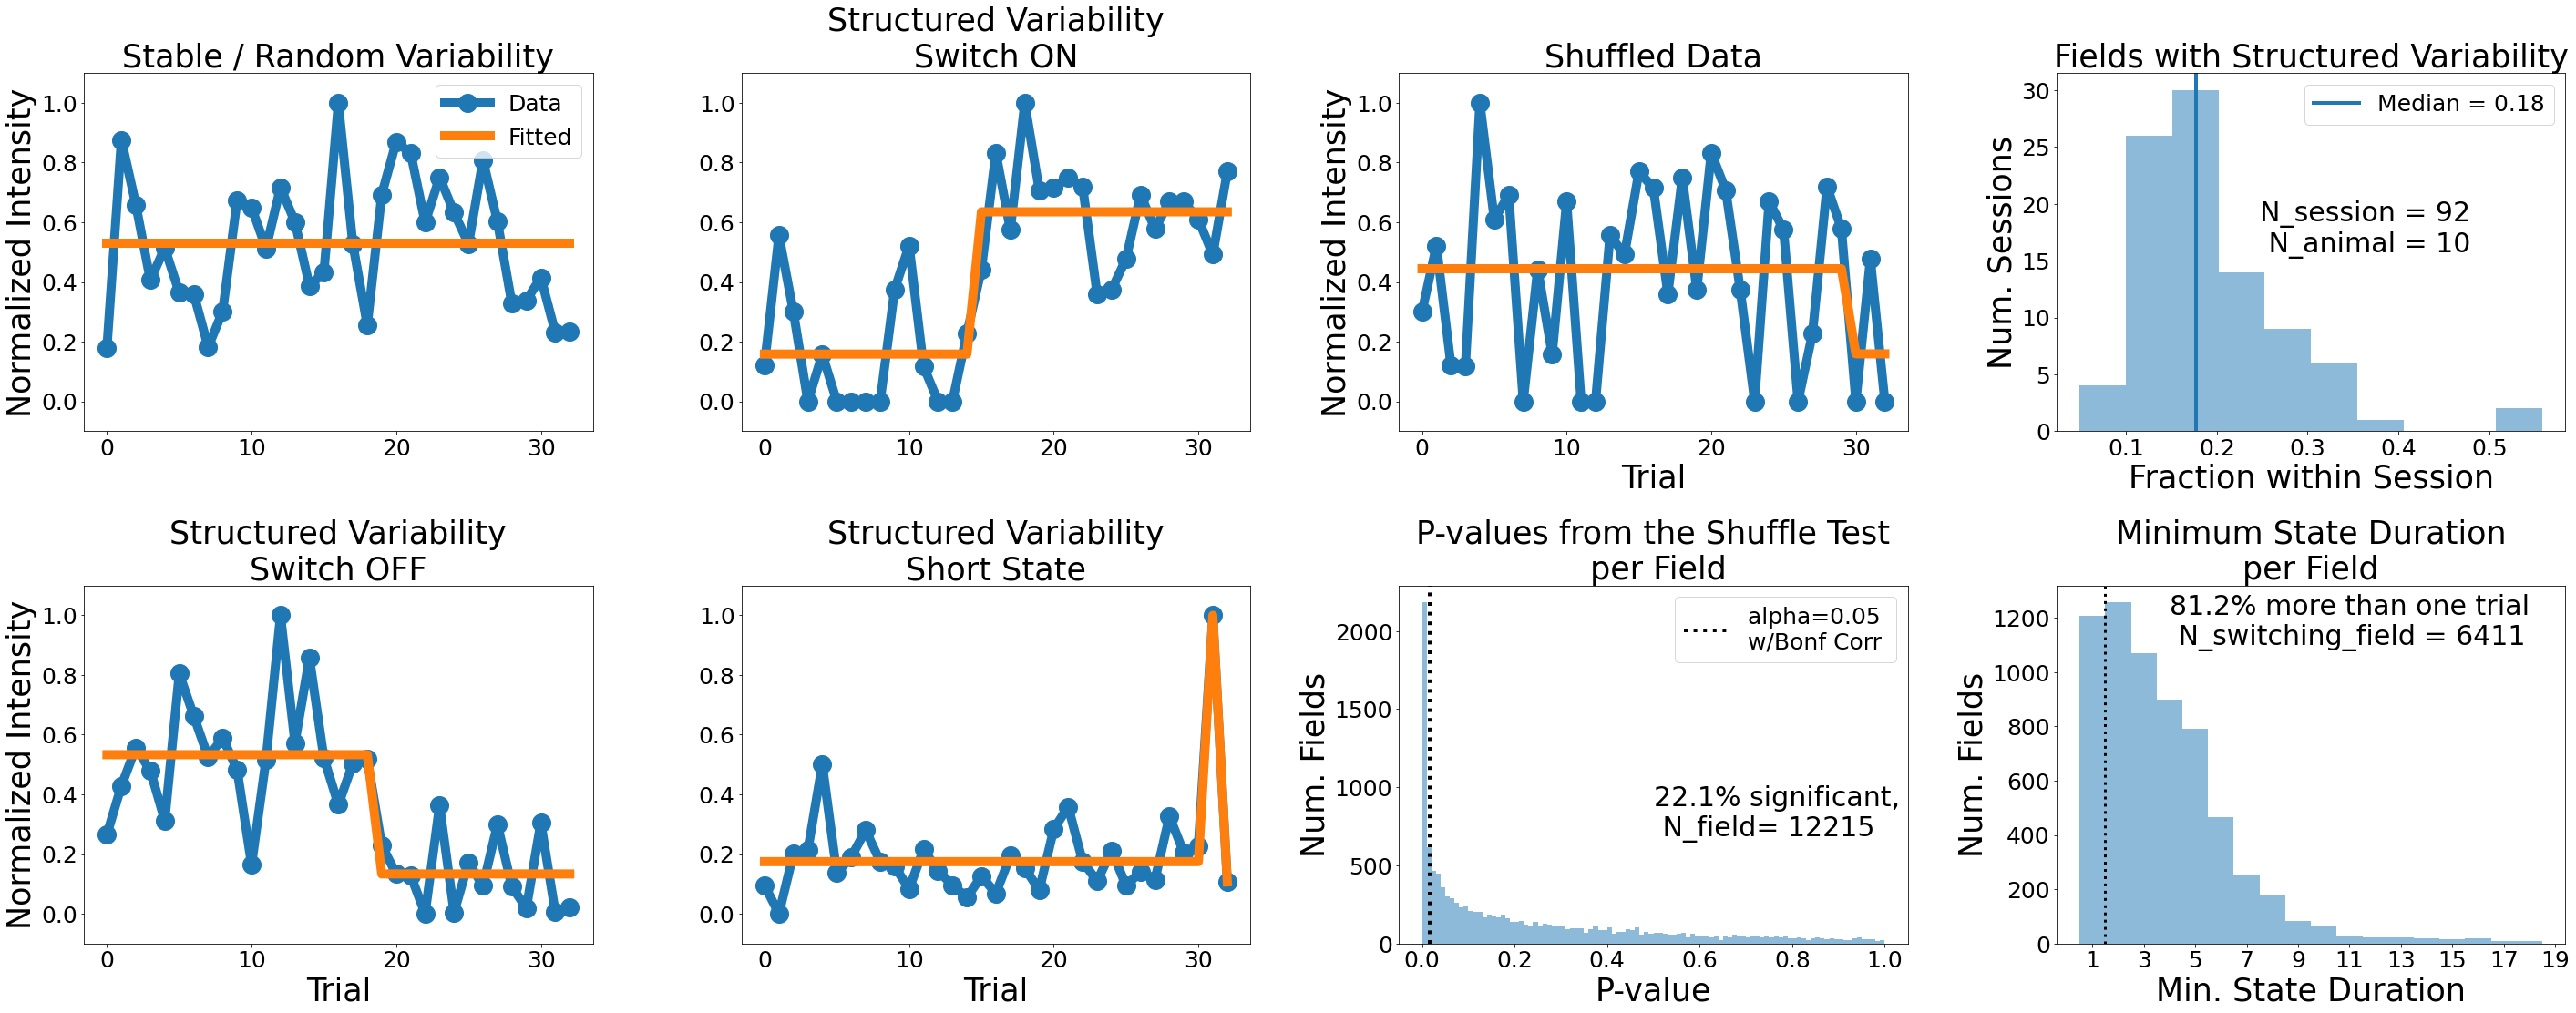

In [104]:
field_ind_i_l = [4,0,2]
field_ind_l = [X_raw_one.index[field_ind_i] for field_ind_i in field_ind_i_l]
field_ind_l.append((97,2))
nplots = len(field_ind_l)
fig,axs=plt.subplots(2,4,figsize=(4*10,2*8),sharey=False,sharex=False)
titles = ['Stable / Random Variability','Structured Variability\nSwitch ON', 'Structured Variability\nSwitch OFF','Structured Variability\nShort State']
for ii,field_ind in enumerate(field_ind_l):
    # field_ind = (3,0)
    actual_max_fr = fr_mean_one.loc[field_ind].max()
    rowind = ii//2
    colind = ii%2
    ax=axs[rowind,colind]
    
#     ax.plot(X_raw_one.loc[field_ind].T,marker='o',linewidth=3,markersize=10,label='Data')
#     ax.plot(X_pwc_one.loc[field_ind].T,linewidth=3,label='Fitted')

#     ax.set_ylim(-0.1,1.1)
    if colind==0:
        ylabel='Normalized Intensity'
    else:
        ylabel=None
    if rowind==1:
        xlabel='Trial'
    else:
        xlabel=None
    title = titles[ii]
#     ax.set_title(titles[ii])
#     ax.set(ylabel='Normalized Intensity',xlabel='Trial',title=titles[ii])
    if ii==0:
#         ax.legend()
        do_legend=True
    else:
        do_legend=False
    data = X_raw_one.loc[field_ind].T
    fitted = X_pwc_one.loc[field_ind].T
    
    fig,ax = plot_data_fitted_one(data,fitted,ylabel=ylabel,xlabel=xlabel,title=title,fig=fig,ax=ax,do_legend=do_legend,lw=10,mksz=20)

# shuffle:
import ruptures as rpt
rng=np.random.default_rng(123)
signal_permuted=rng.permuted(X_raw_one.loc[field_ind_l[1]])
pred = cpa.predict_from_cpts_wrapper(signal_permuted,1,cost='l2',min_size=2,model_type=rpt.Dynp)[0]

ax=axs[0,2]
xlabel='Trial'
ylabel='Normalized Intensity'
title='Shuffled Data'
do_legend=False
fig,ax = plot_data_fitted_one(signal_permuted,pred,ylabel=ylabel,xlabel=xlabel,title=title,fig=fig,ax=ax,do_legend=do_legend,mksz=20,lw=10)

# axs[1,2].axis('off')
text_font_size = 30
ax=axs[1,2]
plot_pvals_allfields(ax=ax,text_font_size=text_font_size)    

ax = axs[0,3]
plot_frac_within_sess_hist(ax=ax,text_font_size=text_font_size)

ax = axs[1,3]
plot_min_state_duration(ax=ax,text_font_size=text_font_size)

plt.tight_layout()

# fig.savefig(os.path.join(figdir,'single_neuron_raw_fitted_intensity_examples.pdf'))
fig.savefig(os.path.join(figdir,'single_neuron_raw_fitted_intensity_examples_with_agg.pdf'))


In [386]:
import nmf_test as nt